# Selección óptima de portafolios II

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/Separation_theorem_of_MPT.svg/2000px-Separation_theorem_of_MPT.svg.png" width="400px" height="400px" />

Entonces, tenemos que:
- La LAC describe las posibles selecciones de riesgo-rendimiento entre un activo libre de riesgo y un activo riesgoso.
- Su pendiente es igual al radio de Sharpe del activo riesgoso.
- La asignación óptima de capital para cualquier inversionista es el punto tangente de la curva de indiferencia del inversionista con la LAC.

Para todo lo anterior, supusimos que ya teníamos el portafolio óptimo (activo riesgoso).

En la clase pasada aprendimos a hallar este portafolio óptimo si el conjunto de activos riesgosos estaba conformado únicamente por dos activos:

$$w_{1,EMV}=\frac{(E[r_1]-r_f)\sigma_2^2-(E[r_2]-r_f)\sigma_{12}}{(E[r_2]-r_f)\sigma_1^2+(E[r_1]-r_f)\sigma_2^2-((E[r_1]-r_f)+(E[r_2]-r_f))\sigma_{12}}.$$

- Sin embargo, la complejidad del problema crece considerablemente con el número de variables, y la solución analítica deja de ser viable cuando mencionamos que un portafolio bien diversificado consta aproximadamente de 50-60 activos.
- En esos casos, este problema se soluciona con rutinas numéricas que hagan la optimización por nosotros, porque son una solución viable y escalable a más variables.
 

**Objetivos:**
- ¿Cuál es el portafolio óptimo de activos riesgosos cuando tenemos más de dos activos?
 - ¿Cómo construir la frontera de mínima varianza cuando tenemos más de dos activos?

*Referencia:*
- Notas del curso "Portfolio Selection and Risk Management", Rice University, disponible en Coursera.
___

## 1. Maximizando el radio de Sharpe

### ¿Qué pasa si tenemos más de dos activos riesgosos?

En realidad es algo muy similar a lo que teníamos con dos activos.
- Para dos activos, construir la frontera de mínima varianza es trivial: todas las posibles combinaciones.
- Con más de dos activos, recordar la definición: la frontera de mínima varianza es el lugar geométrico de los portafolios que proveen el mínimo riesgo para un nivel de rendimiento dado.

<font color=blue> Ver en el tablero.</font>

Analíticamente:
- $N$ activos, 
- caracterizados por $(\sigma_i,E[r_i])$,
- cada uno con peso $w_i$, con $i=1,2,\dots,N$.

Entonces, buscamos los pesos tales que

\begin{align}
\min_{w_1,\dots,w_n} & \quad \sum_{i=1}^{N}w_i^2\sigma_i^2+\sum_{i=1}^{N}\sum_{j=1,j\neq i}^{N}w_iw_j\sigma_{ij}\\
\text{s.a.}          & \quad \sum_{i=1}^{N}w_i=1, w_i\geq0\\
                     & \quad \sum_{i=1}^{N}w_iE[r_i]=\bar{\mu},
\end{align}

donde $\bar{\mu}$ corresponde a un nivel de rendimiento objetivo. 

**Obviamente, tendríamos que resolver este problema para muchos niveles de rendimiento objetivo.**

- <font color=blue> Explicar relación con gráfica.</font>

- <font color=green> Recordar clase 10.</font>

Lo anterior se puede escribir vectorialmente como:

\begin{align}
\min_{\boldsymbol{w}} & \quad \boldsymbol{w}^T\Sigma\boldsymbol{w}\\
\text{s.a.}          & \quad \boldsymbol{1}^T\boldsymbol{w}=1, \boldsymbol{w}\geq0\\
                     & \quad E[\boldsymbol{r}^T]\boldsymbol{w}=\bar{\mu},
\end{align}

donde:
- $\boldsymbol{w}=\left[w_1,\dots,w_N\right]^T$ es el vector de pesos,
- $\boldsymbol{1}=\left[1,\dots,1\right]^T$ es un vector de unos,
- $E[\boldsymbol{r}]=\left[E[r_1],\dots,E[r_N]\right]^T$ es el vector de rendimientos esperados, y
- $\Sigma=\left[\begin{array}{cccc}\sigma_{1}^2 & \sigma_{12}  & \dots  & \sigma_{1N} \\
                                   \sigma_{21}  & \sigma_{2}^2 & \dots  & \sigma_{2N} \\
                                   \vdots       & \vdots       & \ddots & \vdots      \\
                                   \sigma_{N1}  & \sigma_{N2}  & \dots  & \sigma_{N}^2\end{array}\right]$ es la matriz de varianza-covarianza.
                                   
**Esta última forma es la que comúnmente usamos al programar, por ser eficiente y escalable a problemas de N variables.**

### Entonces, ¿para cuántos niveles de rendimiento objetivo tendríamos que resolver el anterior problema con el fin de graficar la frontera de mínima varianza?
- Observar que el problema puede volverse muy pesado a medida que incrementamos el número de activos en nuestro portafolio...
- Una tarea bastante compleja.

### Sucede que, en realidad, sólo necesitamos conocer dos portafolios que estén sobre la *frontera de mínima varianza*.
- Si logramos encontrar dos portafolios sobre la frontera, entonces podemos a la vez encontrar todas las posibles combinaciones de estos dos portafolios para trazar la frontera de mínima varianza.
- Ver el caso de dos activos.

### ¿Qué portafolios usar?
Hasta ahora, hemos estudiando profundamente como hallar dos portafolios muy importantes que de hecho yacen sobre la frontera de mínima varianza:
1. Portafolio de EMV: máximo SR.
2. Portafolio de mínima varianza: básicamente, el mismo problema anterior, sin la restricción de rendimiento objetivo.

Luego, tomar todas las posibles combinaciones de dichos portafolios usando las fórmulas para dos activos de medias y varianzas:
- w: peso para el portafolio EMV,
- 1-w: peso para le portafolio de mínima varianza.

## 2. Ejemplo ilustrativo.

Retomamos el ejemplo de mercados de acciones en los países integrantes del $G5$: EU, RU, Francia, Alemania y Japón.

In [1]:
# Importamos pandas y numpy
import pandas as pd
import numpy as np

In [2]:
# Resumen en base anual de rendimientos esperados y volatilidades
annual_ret_summ = pd.DataFrame(columns=['EU', 'RU', 'Francia', 'Alemania', 'Japon'], index=['Media', 'Volatilidad'])
annual_ret_summ.loc['Media'] = np.array([0.1355, 0.1589, 0.1519, 0.1435, 0.1497])
annual_ret_summ.loc['Volatilidad'] = np.array([0.1535, 0.2430, 0.2324, 0.2038, 0.2298])

annual_ret_summ.round(4)

,EU,RU,Francia,Alemania,Japon
Media,0.1355,0.1589,0.1519,0.1435,0.1497
Volatilidad,0.1535,0.243,0.2324,0.2038,0.2298


In [3]:
# Matriz de correlación
corr = pd.DataFrame(data= np.array([[1.0000, 0.5003, 0.4398, 0.3681, 0.2663],
                                    [0.5003, 1.0000, 0.5420, 0.4265, 0.3581],
                                    [0.4398, 0.5420, 1.0000, 0.6032, 0.3923],
                                    [0.3681, 0.4265, 0.6032, 1.0000, 0.3663],
                                    [0.2663, 0.3581, 0.3923, 0.3663, 1.0000]]),
                    columns=annual_ret_summ.columns, index=annual_ret_summ.columns)
corr.round(4)

,EU,RU,Francia,Alemania,Japon
EU,1.0000,0.5003,0.4398,0.3681,0.2663
RU,0.5003,1.0000,0.5420,0.4265,0.3581
Francia,0.4398,0.5420,1.0000,0.6032,0.3923
Alemania,0.3681,0.4265,0.6032,1.0000,0.3663
Japon,0.2663,0.3581,0.3923,0.3663,1.0000


In [4]:
# Tasa libre de riesgo
rf = 0.05

Esta vez, supondremos que tenemos disponibles todos los mercados de acciones y el activo libre de riesgo.

#### 1. Construir la frontera de mínima varianza

##### 1.1. Encontrar portafolio de mínima varianza

In [5]:
# Importamos funcion minimize del modulo optimize de scipy
import scipy.optimize as opt

In [12]:
## Construcción de parámetros
# 1. Sigma: matriz de varianza-covarianza
S = annual_ret_summ.loc['Volatilidad',:].values
Sigma = np.diag(S).dot(corr).dot(np.diag(S))
# 2. Eind: rendimientos esperados activos individuales
Eind = annual_ret_summ.loc['Media',:].values

In [13]:
# Función objetivo
def var(w, Sigma):
    return w.dot(Sigma).dot(w)

In [17]:
# Dato inicial
n = len(Eind)
w0 = np.ones((n,))/n
# Cotas de las variables
bnds = ((0,1),)*n
# Restricciones
cons = {'type': 'eq', 'fun': lambda w: np.sum(w)-1}

In [22]:
# Portafolio de mínima varianza
min_var = opt.minimize(var, w0, args=(Sigma,), bounds=bnds, constraints=cons)
min_var

     fun: 0.01861776391061502
     jac: array([0.03718246, 0.03881475, 0.03859101, 0.03755156, 0.0370423 ])
 message: 'Optimization terminated successfully.'
    nfev: 49
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([6.17797049e-01, 3.46944695e-18, 0.00000000e+00, 2.09394358e-01,
       1.72808594e-01])

In [23]:
# Pesos, rendimiento y riesgo del portafolio de mínima varianza
w_min_var = min_var.x
E_min_var = Eind.dot(w_min_var)
s_min_var = np.sqrt(var(w_min_var, Sigma))
w_min_var, E_min_var, s_min_var

(array([6.17797049e-01, 3.46944695e-18, 0.00000000e+00, 2.09394358e-01,
        1.72808594e-01]), 0.13962903688859557, 0.13644692708381168)

##### 1.2. Encontrar portafolio EMV

In [25]:
# Función objetivo
def m_sharpe(w, Sigma, rf, Eind):
    Erp = Eind.dot(w)
    sp = np.sqrt(w.dot(Sigma).dot(w))
    return -(Erp - rf)/sp

In [26]:
# Dato inicial
n = len(Eind)
w0 = np.ones((n,))/n
# Cotas de las variables
bnds = ((0,1),)*n
# Restricciones
cons = {'type': 'eq', 'fun': lambda w: np.sum(w)-1}

In [42]:
Sigma[0, 3]

0.011515382729999999

In [43]:
# Portafolio EMV
Sigma[0, 3] = 0.03
EMV = opt.minimize(m_sharpe, w0, args=(Sigma, rf, Eind), bounds=bnds, constraints=cons)
EMV

     fun: -0.6486264234353288
     jac: array([-0.34944289, -0.34854902, -0.34849548, -0.34463324, -0.34936437])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.55893185, 0.093519  , 0.10896782, 0.        , 0.23858133])

In [28]:
# Pesos, rendimiento y riesgo del portafolio EMV
w_EMV = EMV.x
E_EMV = Eind.dot(w_EMV)
s_EMV = np.sqrt(var(w_EMV, Sigma))
w_EMV, E_EMV, s_EMV

(array([0.50714174, 0.07470888, 0.02471533, 0.18943972, 0.20399434]),
 0.1420657564717856,
 0.13856199365687238)

##### 1.3. Construir frontera de mínima varianza

También debemos encontrar la covarianza (o correlación) entre estos dos portafolios:

In [29]:
# Covarianza entre los portafolios
cov_EMV_mv = w_EMV.dot(Sigma).dot(w_min_var)

In [32]:
# Correlación entre los portafolios
corr_EMV_mv = cov_EMV_mv/(s_EMV*s_min_var)

In [37]:
# Vector de w
N = 100
w = np.linspace(-2, 4, N)

In [38]:
# DataFrame de portafolios: 
# 1. Índice: i
# 2. Columnas 1-2: w, 1-w
# 3. Columnas 3-4: E[r], sigma
# 4. Columna 5: Sharpe ratio
frontera = pd.DataFrame(columns=['w', '1-w', 'E[r]', 's', 'SR'])
frontera['w'] = w
frontera['1-w'] = 1-w
frontera['E[r]']=w*E_EMV+(1-w)*E_min_var
frontera['s']=np.sqrt((w*s_EMV)**2+((1-w)*s_min_var)**2+2*w*(1-w)*cov_EMV_mv)
frontera['SR'] = (frontera['E[r]']-rf)/frontera['s']
frontera

,w,1-w,E[r],s,SR
0,-2.000000,3.000000,0.134756,0.141684,0.598203
1,-1.939394,2.939394,0.134903,0.141346,0.600675
2,-1.878788,2.878788,0.135051,0.141020,0.603114
3,-1.818182,2.818182,0.135199,0.140704,0.605518
4,-1.757576,2.757576,0.135346,0.140398,0.607887
5,-1.696970,2.696970,0.135494,0.140104,0.610219
6,-1.636364,2.636364,0.135642,0.139820,0.612514
7,-1.575758,2.575758,0.135789,0.139547,0.614769
8,-1.515152,2.515152,0.135937,0.139285,0.616985
9,-1.454545,2.454545,0.136085,0.139035,0.619160


In [39]:
# Importar librerías de gráficos
import matplotlib.pyplot as plt
%matplotlib inline

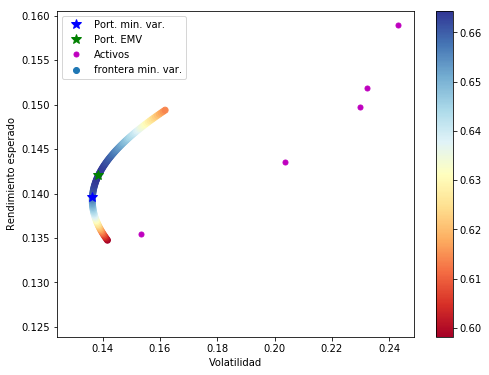

In [41]:
# Gráfica de dispersión de puntos coloreando 
# de acuerdo a SR, los activos individuales
# y los portafolios hallados
plt.figure(figsize=(8,6))
plt.scatter(frontera['s'],
            frontera['E[r]'],
            c=frontera['SR'],
            cmap='RdYlBu',
            label='frontera min. var.')
plt.colorbar()
plt.plot(s_min_var, E_min_var, '*b', ms=10, label='Port. min. var.')
plt.plot(s_EMV, E_EMV, '*g', ms=10, label='Port. EMV')
plt.plot(S, Eind, 'om', ms=5, label='Activos')
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento esperado')
plt.legend(loc='best')

**A partir de lo anterior, solo restaría construir la LAC y elegir la distribución de capital de acuerdo a las preferencias (aversión al riesgo).**
___

## 3. Comentarios finales

### 3.1. Restricciones adicionales

Los inversionistas pueden tener restricciones adicionales:
1. Restricciones en posiciones cortas.
2. Pueden requerir un rendimiento mínimo.
3. Inversión socialmente responsable: prescinden de inversiones en negocios o paises considerados éticamente o políticamente indeseables.

Todo lo anterior se puede incluir como restricciones en el problema de optimización, y puede ser llevado a cabo a costa de un cociente de Sharpe menor.

### 3.2. Críticas a la optimización media varianza
1. Solo importan medias y varianzas: recordar que la varianza subestima el riesgo en algunos casos.
2. Preferencias media-varianza tratan las ganancias y pérdidas simétricamente: el sentimiento de insatisfacción de una perdida es mayor al sentimiento de satisfacción de una ganancia (aversión a pérdidas).
3. La aversión al riesgo es constante: la actitud frente al riesgo puede cambiar, por ejemplo con el estado de la economía.
4. Horizonte corto (un periodo).
5. Basura entra - basura sale: la optimización media varianza es supremamente sensible a las entradas: estimaciones de rendimientos esperados y varianzas.
___

# Anuncios parroquiales

## 1. Revisar archivo Tarea 6.
## 2. Fin de módulo. Abrir Clase0 y revisar objetivos del módulo.
## 3. [Nota interesante](http://yetanothermathprogrammingconsultant.blogspot.com/2016/08/portfolio-optimization-maximize-sharpe.html)

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>